In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
# Hay una ruleta en un casino. La ruleta tiene 18 espacios rojos, 18 espacios negros y 2 espacios verdes.
# Al girar la ruleta si sale rojo el apostador gana 1usd caso contrario el apostador pierde 1usd.
# Desde la vista del casino si sale rojo el casino pierde 1usd y caso contrario el casino gana 1usd.
ruleta = ["rojo"]*18 + ["negro"]*18 + ["verde"]*2
ruleta

# Simular 1000 extracciones 
# Cuanto gana o pierde el casino
# Si sale negro y verde el casino gana 1usd, si sale rojo pierde 1usd

['rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'verde',
 'verde']

In [3]:
dinero_casino = 0
for _ in range(1000): # Simulamos los 1000 giros de la ruleta
    giros = random.choice(ruleta)
    
    if giros == "rojo":
        dinero_casino -= 1  # El apostador gana 1usd, el casino pierde 1usd
    else:
        dinero_casino += 1  # El apostador pierde 1usd, el casino gana 1usd


dinero_casino

-34

In [4]:
def roullete_spin(spins=1000, roullete=ruleta):
    earnings = 0
    for _ in range(spins):
        result = random.choice(roullete)
        if result == "rojo":
            earnings -= 1
        else:
            earnings += 1
    return earnings    

    

In [5]:
roullete_spin()

22

In [9]:
# Sampling model 
samplings = []
for _ in range(10000):
    samplings.append(roullete_spin()) #Lista donde se almacenan los resultados

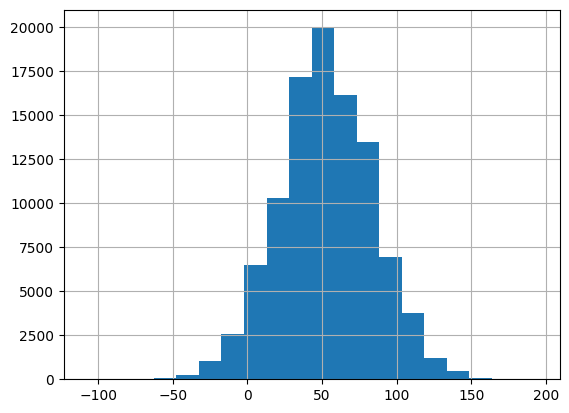

In [18]:
# Plot frecuencies histograms
plt.hist(samplings, bins=20)
plt.grid(True)
plt.show()

In [10]:
# Standard error 
std = np.std(samplings)
std

np.float64(31.25356238191096)

In [11]:
n = len(samplings)
n

10000

In [12]:
# Stadandard error formula
std/np.sqrt(n)

np.float64(0.3125356238191096)